<a href="https://colab.research.google.com/github/Ishaan-ai/task3-spk/blob/master/task3%20GRIP%20TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By-Ishaan Chopra**

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)


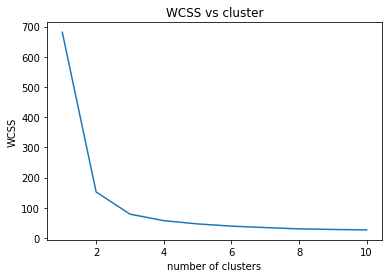

In [2]:
# optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 

plt.plot(range(1, 11), wcss)
plt.title('WCSS vs cluster')
plt.xlabel('number of clusters')
plt.ylabel('WCSS') 
plt.show()



From this we choose the number of clusters as 3

In [3]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

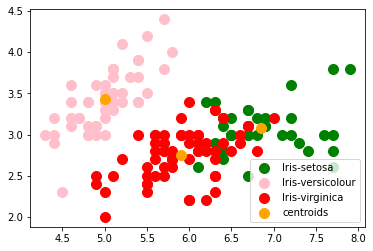

In [4]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'orange', label = 'centroids')

plt.legend()